<center>
<img src="https://imgs.xkcd.com/comics/convincing.png" height="200"> 

# Прикладаная статистика: домашнее задание 1
</center>

> — Куда ты теперь, Док? Назад в будущее? <br> 
>  — Нет, там я уже был.

$\qquad$ $\qquad$ $\qquad$ $\qquad$ **(«Назад в будущее 3»)**


**ФИО:**

Демченко Олег Юрьевич

**Забавный факт о себе:**

В детстве в качестве домашнего животного у меня была лягушка.

## Общая информация


__Дата выдачи:__ 27.02.2022

__Дедлайн:__ 23:59MSK 26.03.2022

## Формат сдачи

Сам ноутбук называйте в формате hw-01-NUM-USERNAME.ipynb, где NUM — номер из вашего логина, а USERNAME — ваши фамилия и имя. Файл надо будет, как обычно, сдать в anytask.

## Оформление

1. Be good, drink milk and [think of Russia](https://www.youtube.com/watch?v=jyxSFfBKMxQ)
2. Обязательно фиксируйте зерно генератора случайных чисел в экспериментах. При перезапуске кода значения не должны меняться.
3. Вверху файла подпишите фамилию, имя, группу и какой-то занимательный факт о себе.
4. Обратите внимание, что у графиков должны быть подписаны оси, заголовок графика и при необходимости обязательно наличие легенды. 

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено.


Для каждого построенного графика делайте выводы. Эти выводы не должны быть поверхностными и очевидными. Не будьте мудрым королём.

<br>

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/andan_2023/main/hw/king.png" width="300"> 
</center>

**Пример плохого вывода:** Синенькая линия идет вверх, а красная вниз. Черненькая идет вниз, а потом вверх. 

<br>

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/andan_2023/main/hw/bad_lines.png" width="600"> 
</center>

Это домашнее задание состоит из двух частей: 

- Часть с кодом
- Часть с ручными задачами

Часть с кодом должна быть оформлена на в юпитерской тетрадке. Весь код необходимо писать на python.

Ручную часть можно решать на бумаге и оформить в виде отсканированной pdf-ки с разборчивым почерком. Можно вбить решение в виде формул прямо в юпитерскую тетрадку, можно сделать pdf-ку в техе.

## Часть 1: ручная

За эту часть можно набрать 50 баллов. Также можно набрать бонусные 15 баллов. 

Условия задач [лежат по ссылке](https://github.com/FUlyankin/yet_another_matstat_course/blob/main/hw_matstat/yam_hw01-hakuna_matata_tasks.pdf)

## Часть 2: парадоксальная

За эту часть можно набрать 50 баллов.

- подробнее про [парадокс инспектора](https://towardsdatascience.com/the-inspection-paradox-is-everywhere-2ef1c2e9d709)
- подробнее про [парадокс Берксона](https://en.wikipedia.org/wiki/Berkson%27s_paradox)
- забыли как в питоне делать симуляции? Смотрите видео с [первой недели онлайн-курса!](https://www.youtube.com/watch?v=xJV5t4-GsNM&list=PLCf-cQCe1FRxW2QMJbWBl4SSkVAPhId_e&index=6)
- забыли чо такое ЦПТ и ЗБЧ? Смотрите видео с [пятой недели онлайн-курса!](https://www.youtube.com/watch?v=ivpWyorfWlA&list=PLCf-cQCe1FRyg1ajZ2HJVKknbuTujBOLN&index=11)

### Задача 1 (Парадокс Берксона)

Предположим, что результаты ЕГЭ школьников по русскому и математике независимы и хорошо аппроксимируются 
нормальным распределением с ожиданием 60 и стандартным отклонением 10. 

УШЭ (Урюпинская Школа Экономики) ныне престижна и забирает себе всех школьников набравших более $n$ баллов в сумме по русскому и математике. 

Для каждого $n$ от $80$ до $160$ с шагом $5$ случайно создайте $10^4$ школьников и поделите их на прошедших и не прошедших в УШЭ.


__а) [5 баллов]__ Постройте график числа прошедших в УШЭ в зависимости от $n$. 

__б) [5 баллов]__ Постройте график выборочной корреляции между результатами по русскому и математике в зависимости от $n$ среди прошедших в УШЭ.

__в) [5 баллов]__ Постройте график выборочной корреляции между результатами по русскому и математике в зависимости от $n$ среди не прошедших в УШЭ.

В чём заключается парадокс? Прокомментируйте получившиеся результаты.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from numpy.polynomial.polynomial import polyfit

RANDOM_SEED=42
np.random.seed(RANDOM_SEED)

mu, sigma, number_of_students = 60, 10, 10**4
min_n, max_n, step = 80, 160, 5

results = {}
  
for n in range(min_n, max_n, step):
  math_distribution = np.random.normal(mu, sigma, number_of_students)
  russian_distribution = np.random.normal(mu, sigma, number_of_students)
  
  results[n] = (math_distribution, russian_distribution)

/tmp/ipykernel_3236/3797017218.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


__а) [5 баллов]__ Постройте график числа прошедших в УШЭ в зависимости от $n$. 

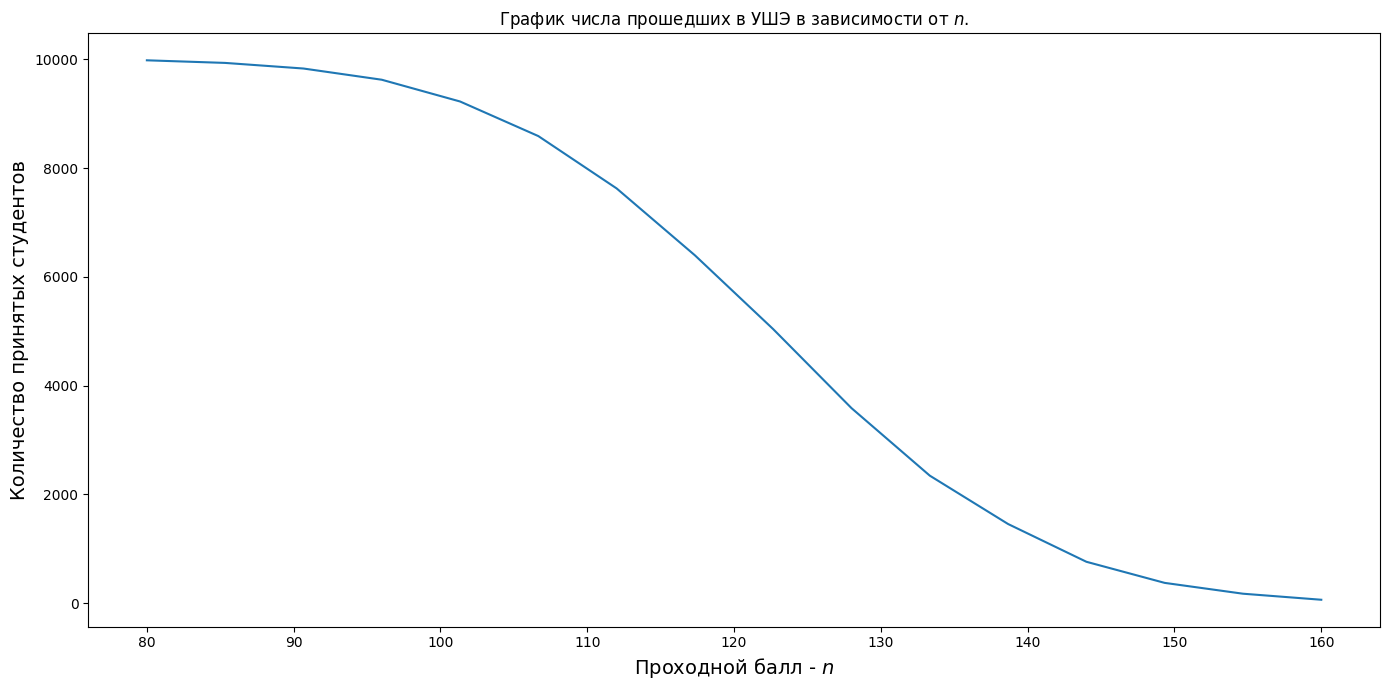

In [31]:
plt.rcParams["figure.figsize"] = [14.00, 7]
plt.rcParams["figure.autolayout"] = True

y1 = []

for n, source_distributions in results.items():
    # combine results for russian and math
    combined = np.add(source_distributions[0], source_distributions[1])
    
    # check the number of accepted students
    passed = len(combined[combined > n])
    
    y1.append(passed)

x1 = np.linspace(min_n, max_n, len(results))

plt.xlabel('Проходной балл - $n$', fontsize=14)
plt.ylabel('Количество принятых студентов', fontsize=14)
plt.title('График числа прошедших в УШЭ в зависимости от $n$.')
plt.plot(x1, y1)
plt.show()

__б) [5 баллов]__ Постройте график выборочной корреляции между результатами по русскому и математике в зависимости от $n$ среди прошедших в УШЭ.

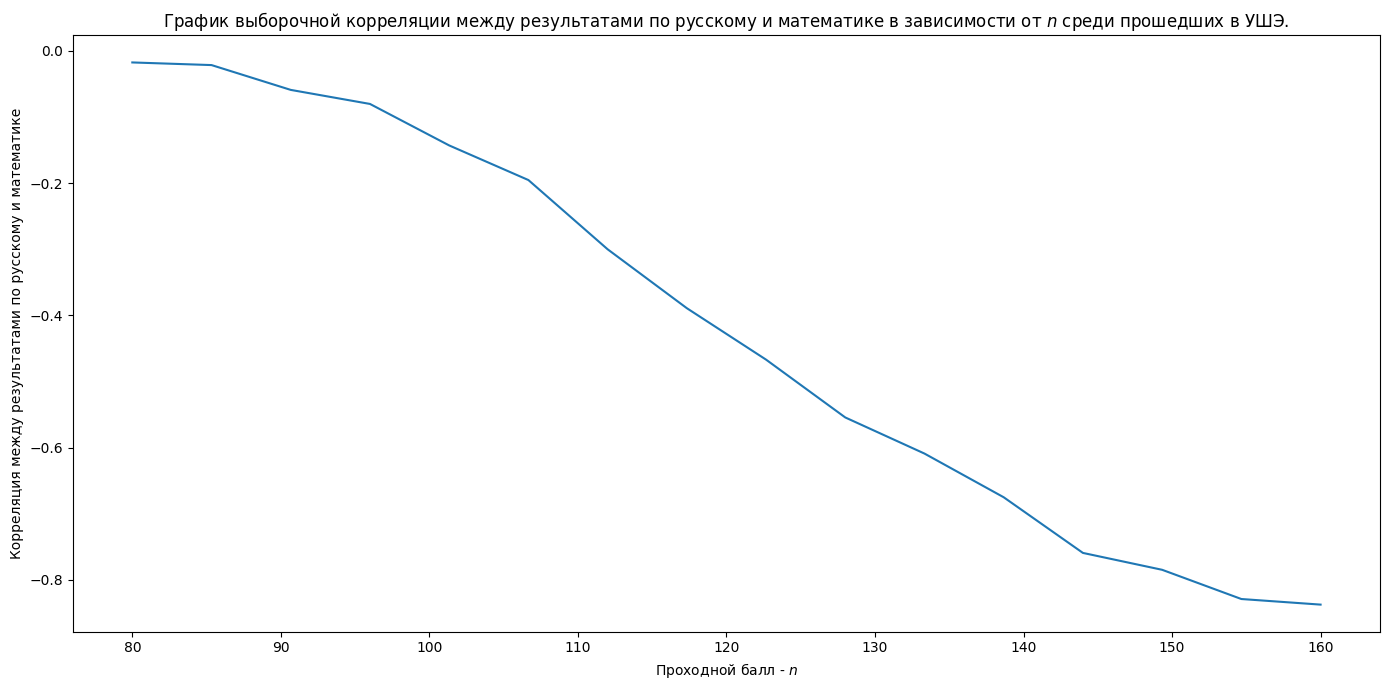

In [32]:
plt.rcParams["figure.figsize"] = [14.00, 7]
plt.rcParams["figure.autolayout"] = True

y1 = []

for n, source_distributions in results.items():
    math_distribution = source_distributions[0]
    russian_distribution = source_distributions[1]
    
    # get indicies of students who passed the exams
    combined = np.add(math_distribution, russian_distribution)
    passed_indicies = []
    [passed_indicies.append(i) for i in range(len(combined)) if combined[i] > n]
    
    # get math and russian exam results only for students who were accepted to the university
    math_distribution = math_distribution[passed_indicies]
    russian_distribution = russian_distribution[passed_indicies]
    
    corr_math_russian = pearsonr(math_distribution, russian_distribution)[0]
    y1.append(corr_math_russian)

x1 = np.linspace(min_n, max_n, len(results))

plt.xlabel('Проходной балл - $n$', fontsize=10)
plt.ylabel('Корреляция между результатами по русскому и математике', fontsize=10)
plt.title('График выборочной корреляции между результатами по русскому и математике в зависимости от $n$ среди прошедших в УШЭ.')
plt.plot(x1, y1)
plt.show()

passed_average_correlation = np.average(y1)

__в) [5 баллов]__ Постройте график выборочной корреляции между результатами по русскому и математике в зависимости от $n$ среди не прошедших в УШЭ.

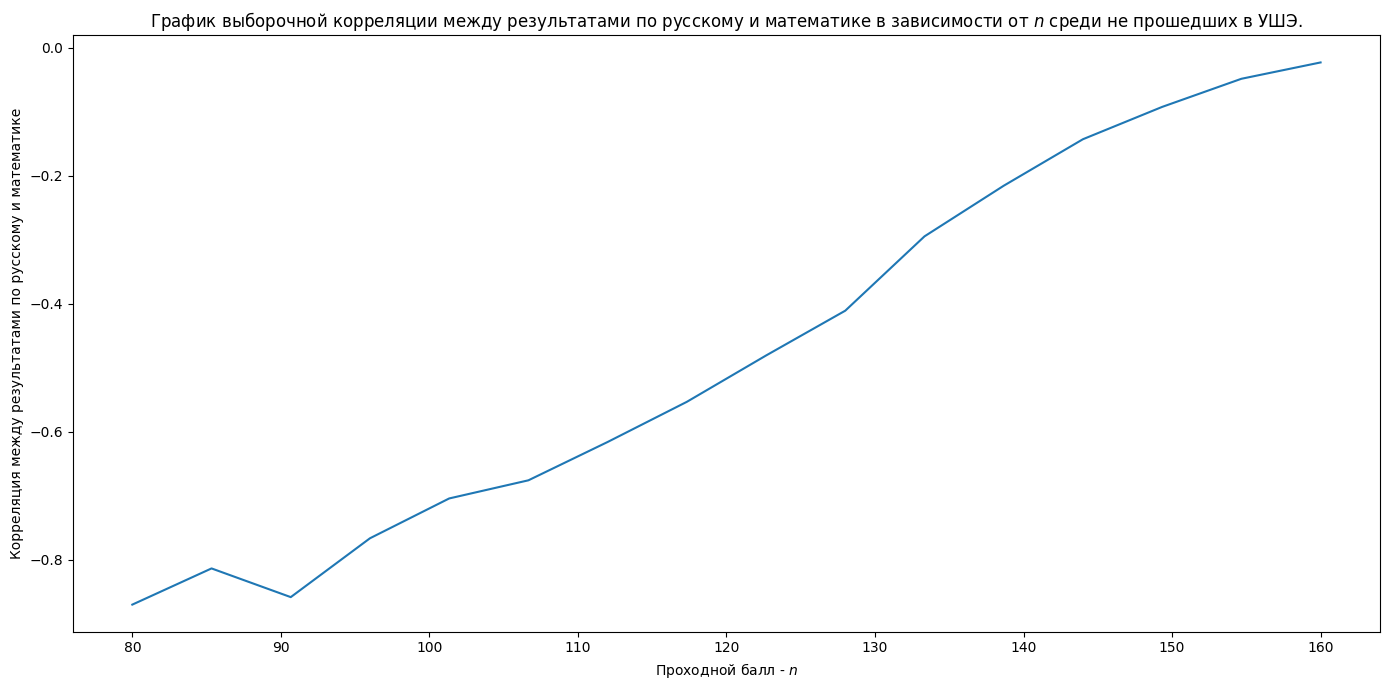

In [33]:
plt.rcParams["figure.figsize"] = [14.00, 7]
plt.rcParams["figure.autolayout"] = True

y1 = []

for n, source_distributions in results.items():
    math_distribution = source_distributions[0]
    russian_distribution = source_distributions[1]
    
    # get indicies of students who did not pass the exams
    combined = np.add(math_distribution, russian_distribution)
    failed_indicies = []
    [failed_indicies.append(i) for i in range(len(combined)) if combined[i] <= n] # the key difference with the previous code cell
    
    # get math and russian exam results only for students who were not accepted to the university
    math_distribution = math_distribution[failed_indicies]
    russian_distribution = russian_distribution[failed_indicies]
    
    # calculate correlation
    corr_math_russian = pearsonr(math_distribution, russian_distribution)[0]
    y1.append(corr_math_russian)

x1 = np.linspace(min_n, max_n, len(results))

plt.xlabel('Проходной балл - $n$', fontsize=10)
plt.ylabel('Корреляция между результатами по русскому и математике', fontsize=10)
plt.title('График выборочной корреляции между результатами по русскому и математике в зависимости от $n$ среди не прошедших в УШЭ.')
plt.plot(x1, y1)
plt.show()

failed_average_correlation = np.average(y1)

> В чём заключается парадокс?

Парадокс Берксона заключается в том, что иногда мы наблюдаем отрицательную корреляцию между двумя свойствами при выборке из «особой» совокупности. В то время как на самом деле эти два свойства могут не иметь корреляции или даже иметь положительную корреляцию. 

В примере с вики два свойства — талант и привлекательность — не коррелируют в генеральной совокупности. Тогда выборка из популяции знаменитостей может привести к ошибочному выводу о том, что талант отрицательно коррелирует с привлекательностью, поскольку люди, которые ни талантливы, ни привлекательны, обычно не становятся знаменитостями. 

> Прокомментируйте получившиеся результаты.

Теперь давайте посмотрим, как это применимо к нашему примеру. Возьмем среднюю корреляцию между математикой и русским языком для обеих групп студентов, сдавших и не сдавших экзамен.

In [34]:
print('Средняя корреляция сдавших экзамен: ' + str(passed_average_correlation))
print('Средняя корреляция не сдавших экзамен: ' + str(failed_average_correlation))

Средняя корреляция сдавших экзамен: -0.42008916512455324
Средняя корреляция не сдавших экзамен: -0.4729284167585378


Можно сделать предположение, что корреляция между результатами ЕГЭ по математике и русскому языку является отрицательной.

Теперь посчитаем корреляцию между результатами ЕГЭ по математике и русскому языку, не разделяя совокупность студентов.

In [35]:
plt.rcParams["figure.figsize"] = [14.00, 7]
plt.rcParams["figure.autolayout"] = True

y1 = []

for n, source_distributions in results.items():
    math_distribution = source_distributions[0]
    russian_distribution = source_distributions[1]
    
    corr_math_russian = pearsonr(math_distribution, russian_distribution)[0]
    y1.append(corr_math_russian)

x1 = np.linspace(min_n, max_n, len(results))
print(np.average(y1))

-0.0026357257116724677


Среднее значение корреляции почти равно нулю. На самом деле это то, что мы ожидаем увидеть, потому что распределения для экзаменов по русскому языку и математике нормальные и независимые. Давайте посмотрим на наши «облака» данных где n равно 120.

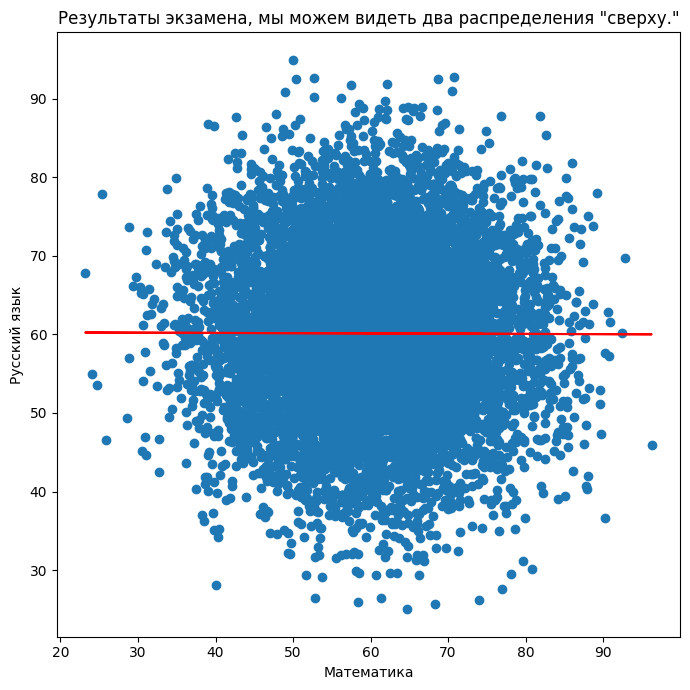

In [36]:
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True

n = 120

math_distribution = results[n][0]
russian_distribution = results[n][1]

b, m = polyfit(math_distribution, russian_distribution, 1)

plt.scatter(math_distribution, russian_distribution)
plt.plot(math_distribution, b + m * math_distribution, '-', color='red')

plt.xlabel('Математика', fontsize=10)
plt.ylabel('Русский язык', fontsize=10)
plt.title('Результаты экзамена, мы можем видеть два распределения "сверху."')
plt.show()

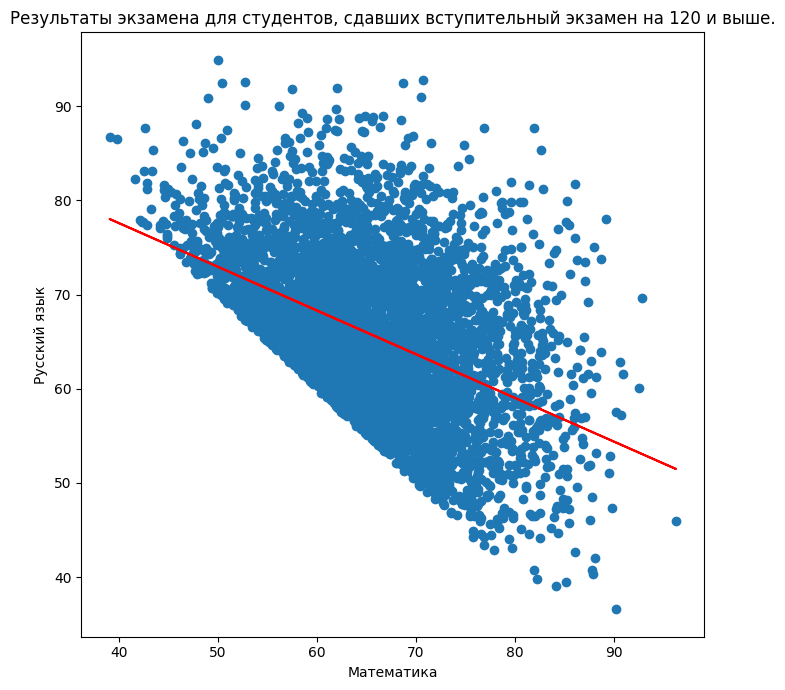

In [37]:
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True

math_distribution = results[120][0]
russian_distribution = results[120][1]

# get indicies of students who passed the exams
combined = np.add(math_distribution, russian_distribution)
passed_indicies = []
[passed_indicies.append(i) for i in range(len(combined)) if combined[i] > n]

# get math and russian exam results only for students who were accepted to the university
math_distribution = math_distribution[passed_indicies]
russian_distribution = russian_distribution[passed_indicies]

b, m = polyfit(math_distribution, russian_distribution, 1)

plt.scatter(math_distribution, russian_distribution)
plt.plot(math_distribution, b + m * math_distribution, '-', color='red')

plt.xlabel('Математика', fontsize=10)
plt.ylabel('Русский язык', fontsize=10)
plt.title('Результаты экзамена для студентов, сдавших вступительный экзамен на 120 и выше.')
plt.show()

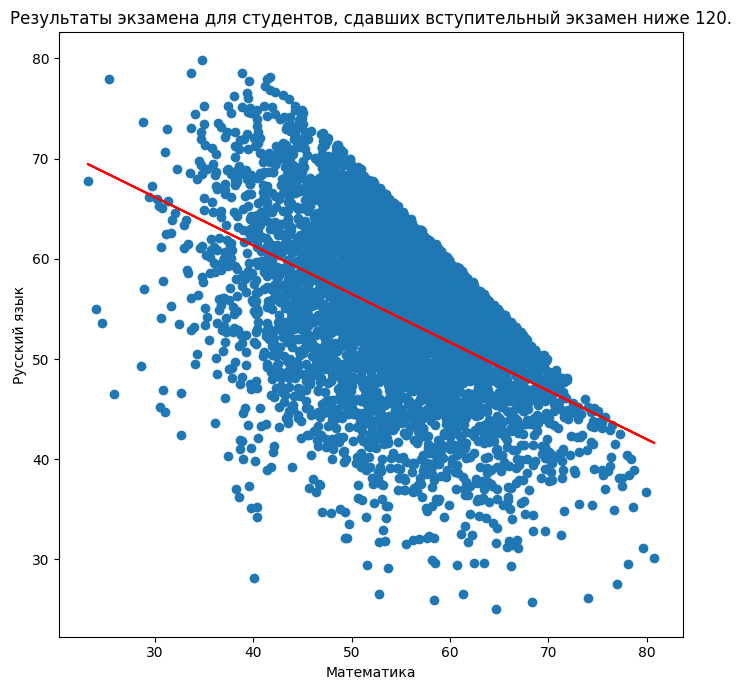

In [38]:
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True

math_distribution = results[120][0]
russian_distribution = results[120][1]

# get indicies of students who did not pass the exams
combined = np.add(math_distribution, russian_distribution)
failed_indicies = []
[failed_indicies.append(i) for i in range(len(combined)) if combined[i] <= n] # the key difference with the previous code cell

# get math and russian exam results only for students who were not accepted to the university
math_distribution = math_distribution[failed_indicies]
russian_distribution = russian_distribution[failed_indicies]

b, m = polyfit(math_distribution, russian_distribution, 1)

plt.scatter(math_distribution, russian_distribution)
plt.plot(math_distribution, b + m * math_distribution, '-', color='red')

plt.xlabel('Математика', fontsize=10)
plt.ylabel('Русский язык', fontsize=10)
plt.title('Результаты экзамена для студентов, сдавших вступительный экзамен ниже 120.')
plt.show()

Теперь мы можем увидеть механизм того, как нулевая корреляция превращается в отрицательную корреляцию, когда мы разделяем наше обычное облако на две части.

### Задача 2 (Парадокс инспектора)

Автобусы отходят от автостанции с 8:00 до 20:00. Первый автобус отходит ровно в 8:00. Затем интервалы между автобусами случайны, независимы и равновероятно равны либо 5-и, либо 10-и минутам. Будем считать, что за минуту на автостанцию приходит ровно один пассажир, и все пассажиры едут ближайшим автобусом.

Проведите $10^4$ экспериментов и с их помощью:

__а) [5 баллов]__ Постройте гистограмму количества автобусов, отошедших от автостанции за сутки. Похоже ли визуально распределение на нормальное?

__б) [5 баллов]__ Инспектор Тимон выбирает равновероятно один из всех автобусов отошедших от автостанции за сутки. Постройте гистограмму числа пассажиров на этом автобусе. Оцените математическое ожидание и дисперсию этого числа.

__в) [5 баллов]__ Инспектор Пумба приходит на автостанцию в случайный момент времени, равномерный от 8:00 до 20:00 и садится в первый пришедший автобус. Постройте гистограмму числа пассажиров на этом автобусе. Оцените математическое ожидание и дисперсию этого числа.

__г) [5 баллов]__ Как изменятся ответы на эти вопросы, если время между автобусами будет экспоненциально со средним в 10 минут?

__Пояснения:__ первый автобус можно не включать в выборку, Пумбу за пассажира можно не считать. 

В чём заключается парадокс? Прокомментируйте получившиеся результаты.

In [39]:
import random

bus_service_start_hour = 8 # 8AM
bus_service_stop_hour = 20 # 8PM

number_of_work_hours = 20 - 8
number_of_work_minutes = number_of_work_hours * 60

intervals_between_busses = [5, 10] # can be either five or ten minutes

# assume that busses run with a five minute interval,
# then the max number of intervals we need is:
max_number_of_intervals = int(number_of_work_minutes / intervals_between_busses[0])

def run_experiment(use_exponential=False):
    if use_exponential == True:
        experiment_intervals = np.random.exponential(scale=10, size=max_number_of_intervals)
    else:
        experiment_intervals = random.choices(intervals_between_busses, k=max_number_of_intervals)
    
    minutes_waited = 0
    current_time = bus_service_start_hour * 60
    
    bus_departures = []
    
    for i in range(len(experiment_intervals)):
        if i == 0:
            minutes_waited = experiment_intervals[i]
            continue
        
        bus_departure_time = current_time + minutes_waited
        
        # if it's past 8PM then we should shut down the bus service
        if bus_departure_time >= bus_service_stop_hour * 60:
            break
        
        passengers = minutes_waited
        bus_departures.append((bus_departure_time, passengers))
        
        current_time = bus_departure_time
        minutes_waited = experiment_intervals[i]
        
    return bus_departures

__а) [5 баллов]__ Постройте гистограмму количества автобусов, отошедших от автостанции за сутки. Похоже ли визуально распределение на нормальное?

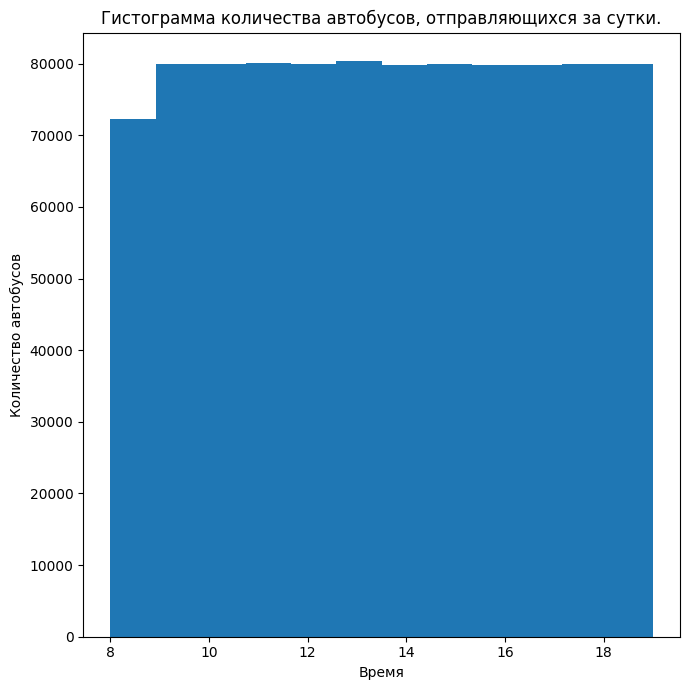

In [40]:
bus_departure_times = []

for i in range(10**4):
    bus_departures = run_experiment()
    [bus_departure_times.append(int(d[0] / 60)) for d in bus_departures]

plt.hist(bus_departure_times, density=False, bins=number_of_work_hours)
plt.ylabel('Количество автобусов', fontsize=10)
plt.xlabel('Время', fontsize=10)
plt.title('Гистограмма количества автобусов, отправляющихся за сутки.')
plt.show()

> Похоже ли визуально распределение на нормальное?

Нет, гистограмма больше похожа на равномерное распределение.

__б) [5 баллов]__ Инспектор Тимон выбирает равновероятно один из всех автобусов отошедших от автостанции за сутки. Постройте гистограмму числа пассажиров на этом автобусе. Оцените математическое ожидание и дисперсию этого числа.

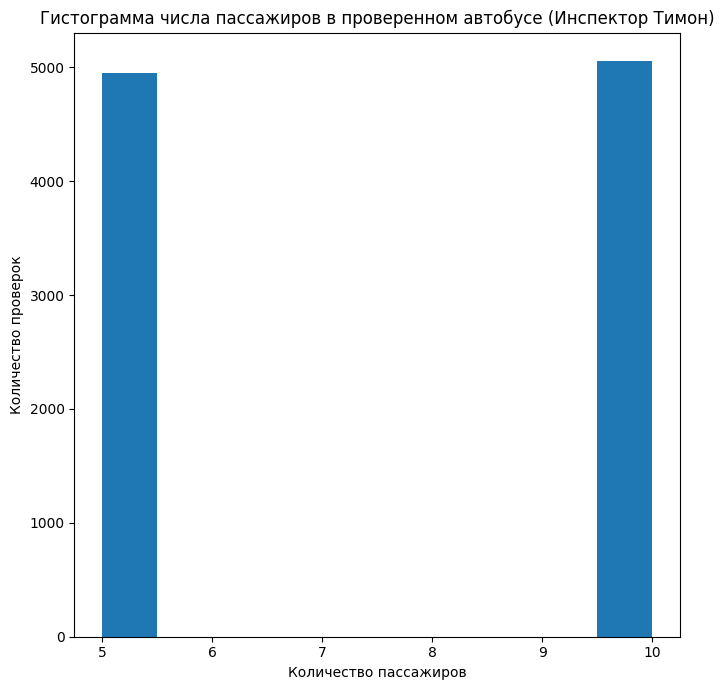

In [41]:
passangers = []

for i in range(10**4):
    bus_departures = run_experiment()
    inspected_bus = random.choice(bus_departures)
    passangers.append(inspected_bus[1])

plt.hist(passangers, density=False)
plt.ylabel('Количество проверок', fontsize=10)
plt.xlabel('Количество пассажиров', fontsize=10)
plt.title('Гистограмма числа пассажиров в проверенном автобусе (Инспектор Тимон)')
plt.show()

In [42]:
expected_value = np.mean(passangers)
dispersion = np.mean(np.array(passangers)**2) - expected_value**2

print('Математическое ожидание: ' + str(expected_value))
print('Дисперсия: ' + str(dispersion))

Математическое ожидание: 7.526
Дисперсия: 6.249324000000001


__в) [5 баллов]__ Инспектор Пумба приходит на автостанцию в случайный момент времени, равномерный от 8:00 до 20:00 и садится в первый пришедший автобус. Постройте гистограмму числа пассажиров на этом автобусе. Оцените математическое ожидание и дисперсию этого числа.

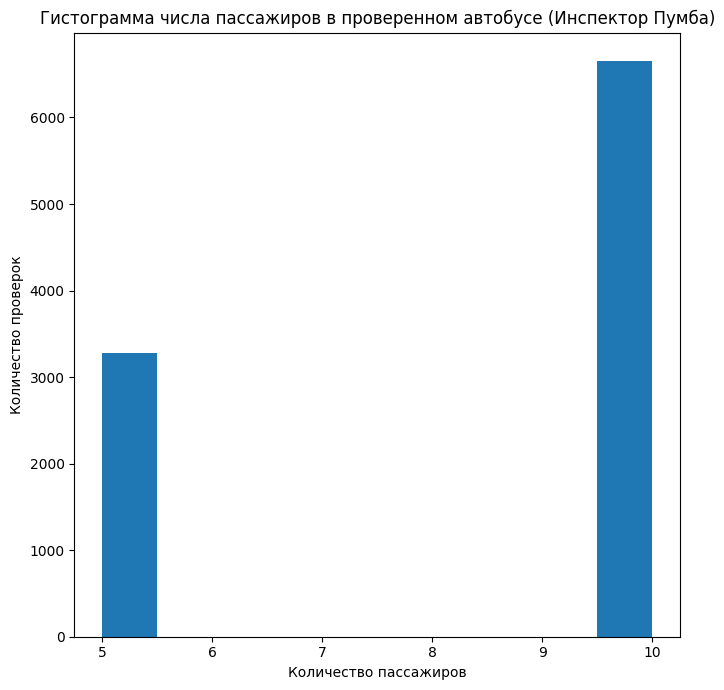

In [43]:
passangers = []

for i in range(10**4):
    time_when_pumba_shows_up = int(np.random.choice([np.random.uniform(bus_service_start_hour*60, bus_service_stop_hour*60)]))
    bus_departures = run_experiment()
    
    for j in range(len(bus_departures)):
        if bus_departures[j][0] >= time_when_pumba_shows_up:
            passangers.append(bus_departures[j][1])
            break

plt.hist(passangers, density=False)
plt.ylabel('Количество проверок', fontsize=10)
plt.xlabel('Количество пассажиров', fontsize=10)
plt.title('Гистограмма числа пассажиров в проверенном автобусе (Инспектор Пумба)')
plt.show()

In [44]:
expected_value = np.mean(passangers)
dispersion = np.mean(np.array(passangers)**2) - expected_value**2

print('Математическое ожидание: ' + str(expected_value))
print('Дисперсия: ' + str(dispersion))

Математическое ожидание: 8.350297289126273
Дисперсия: 5.526994520104509


__г) [5 баллов]__ Как изменятся ответы на эти вопросы, если время между автобусами будет экспоненциально со средним в 10 минут?

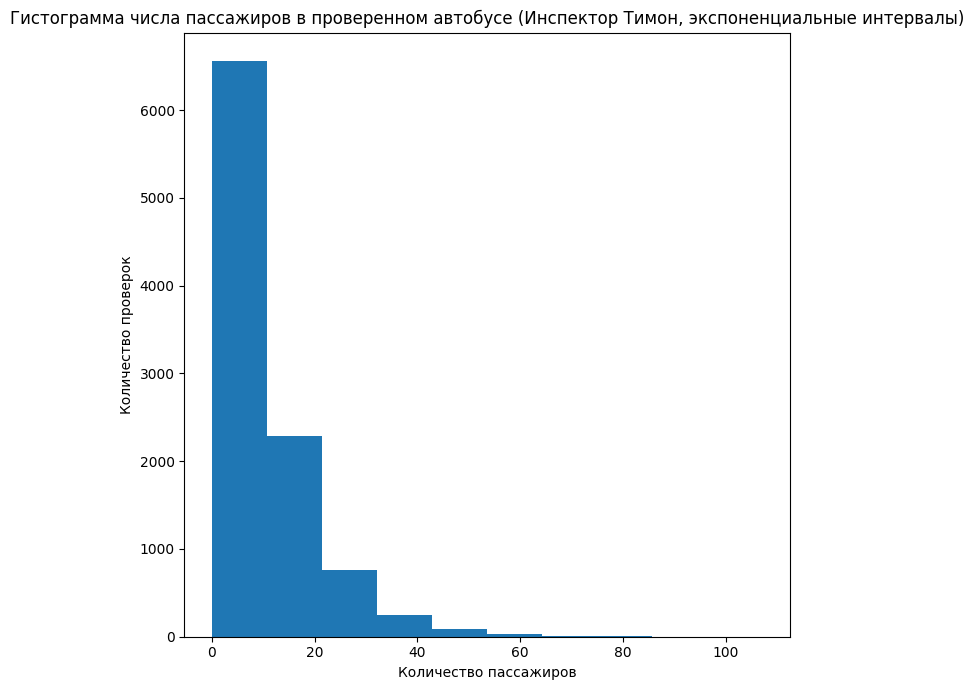

Математическое ожидание: 10.00414074055576
Дисперсия: 101.85503052146929


In [45]:
passangers = []

for i in range(10**4):
    bus_departures = run_experiment(use_exponential=True)
    inspected_bus = random.choice(bus_departures)
    passangers.append(inspected_bus[1])

plt.hist(passangers, density=False)
plt.ylabel('Количество проверок', fontsize=10)
plt.xlabel('Количество пассажиров', fontsize=10)
plt.title('Гистограмма числа пассажиров в проверенном автобусе (Инспектор Тимон, экспоненциальные интервалы)')
plt.show()

expected_value = np.mean(passangers)
dispersion = np.mean(np.array(passangers)**2) - expected_value**2

print('Математическое ожидание: ' + str(expected_value))
print('Дисперсия: ' + str(dispersion))

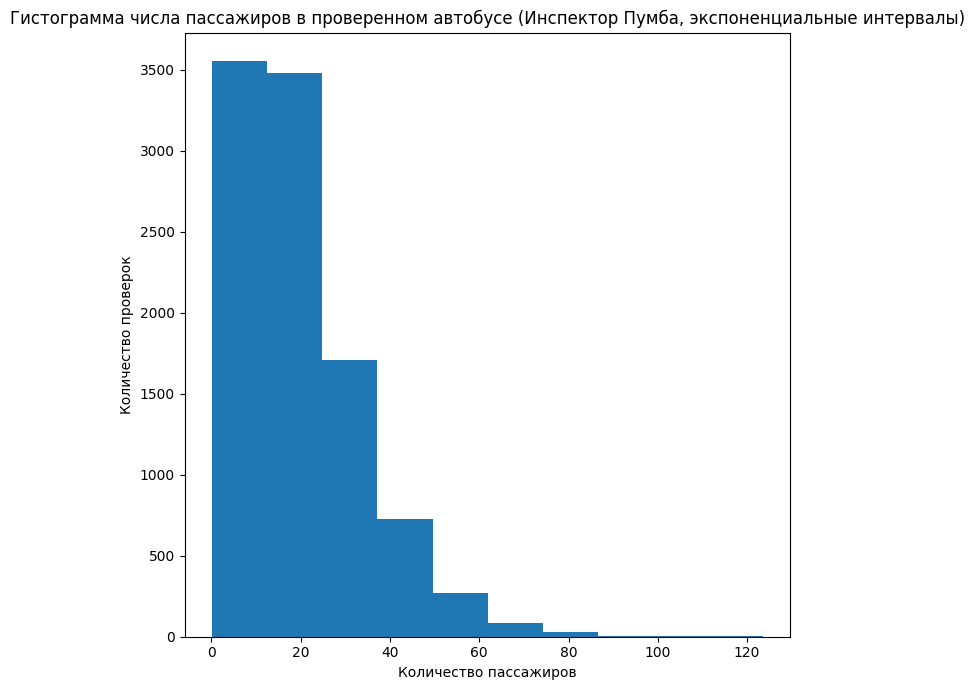

Математическое ожидание: 19.81756961851435
Дисперсия: 195.1745915236071


In [46]:
passangers = []

for i in range(10**4):
    time_when_pumba_shows_up = int(np.random.choice([np.random.uniform(bus_service_start_hour*60, bus_service_stop_hour*60)]))
    bus_departures = run_experiment(use_exponential=True)
    
    for j in range(len(bus_departures)):
        if bus_departures[j][0] >= time_when_pumba_shows_up:
            passangers.append(bus_departures[j][1])
            break

plt.hist(passangers, density=False)
plt.ylabel('Количество проверок', fontsize=10)
plt.xlabel('Количество пассажиров', fontsize=10)
plt.title('Гистограмма числа пассажиров в проверенном автобусе (Инспектор Пумба, экспоненциальные интервалы)')
plt.show()

expected_value = np.mean(passangers)
dispersion = np.mean(np.array(passangers)**2) - expected_value**2

print('Математическое ожидание: ' + str(expected_value))
print('Дисперсия: ' + str(dispersion))

> В чём заключается парадокс? Прокомментируйте получившиеся результаты.

Суть парадокса в том, что наблюдаемое распределение будет меняться в зависимости от размера группы, наблюдавшей тот или иной эффект.

Например, будет больше сообщений от людей, которые ездят в переполненных автобусах, потому что людей, которые ездят в не переполненных автобусах, просто меньше. Это происходит потому, что существует дисбаланс между этими двумя классами. На самом деле количество переполненных и не переполненных автобусов может быть одинаковым.

В нашем примере инспектор Тимон получил результаты, более близкие к реальности:

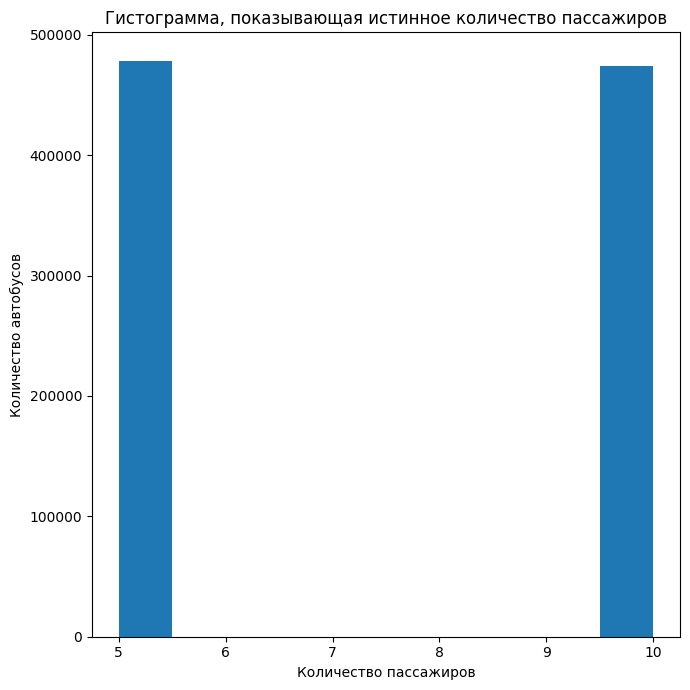

In [47]:
passangers = []

for i in range(10**4):
    bus_departures = run_experiment()
    
    for j in range(len(bus_departures)):
        passangers.append(bus_departures[j][1])

plt.hist(passangers, density=False)
plt.ylabel('Количество автобусов', fontsize=10)
plt.xlabel('Количество пассажиров', fontsize=10)
plt.title('Гистограмма, показывающая истинное количество пассажиров')
plt.show()

Результаты проверок Пумбы показывают, что автобусов с 10 человек больше. Почему так?

Это происходит потому, что Пумба прибывает на автобусную остановку в случайное время. Следовательно, его шансы попасть туда во время десятиминутного интервала выше. Следовательно, количество автобусов с десятью людьми в его отчете больше, чем реальное число таких автобусов.

### Задача 3 (что-то похожее на ЦПТ, но в обратную сторону)

Автору домашки вкинули эту задачу в качестве вступительного испытания на стажировку. В листочке было около десяти похожих задач. Решать надо было руками без компьютера. Но мы попробуем с. 

Пусть $X \sim N(0, \sigma^2)$. Пусть $\Phi(x)$ — функция распределения для $N(0,1)$. Нужно найти математическое ожидание для случайной величины $\Phi(X)$. 

__а) [2.5 балла]__ Оцените $\mathbb{E}(\Phi(X))$ с помощью симуляций

__б) [2.5 балла]__ Постройте для случайной величины $\Phi(X)$ гистограмму. Возьмите $\sigma = 1$, после $\sigma = 3$, после $\sigma = 100$. Как ведёт себя распределение при росте дисперсии? Как думаете, к какой случайной величине сойдётся это распределение?

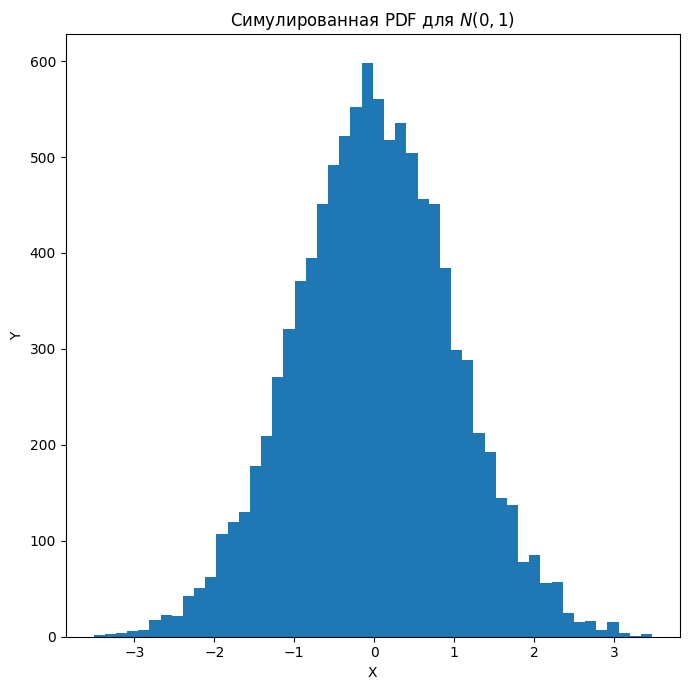

In [48]:
norm_distribution = np.random.normal(0, 1, 10**4)

plt.hist(norm_distribution, density=False, bins=50)
plt.ylabel('Y', fontsize=10)
plt.xlabel('X', fontsize=10)
plt.title('Симулированная PDF для $N(0,1)$')
plt.show()

In [49]:
import scipy

norm_cdf = scipy.stats.norm.cdf(norm_distribution)
print('Математическое ожидание: E[Phi(X)]: ' + str(np.mean(norm_cdf)))

Математическое ожидание: E[Phi(X)]: 0.5004309837797793


[2.5 балла]__ Постройте для случайной величины $\Phi(X)$ гистограмму. Возьмите $\sigma = 1$, после $\sigma = 3$, после $\sigma = 100$. Как ведёт себя распределение при росте дисперсии? Как думаете, к какой случайной величине сойдётся это распределение?

Text(0.5, 1.0, 'Гистограмма $\\Phi(X)$, $\\sigma = 1, 3, 100$')

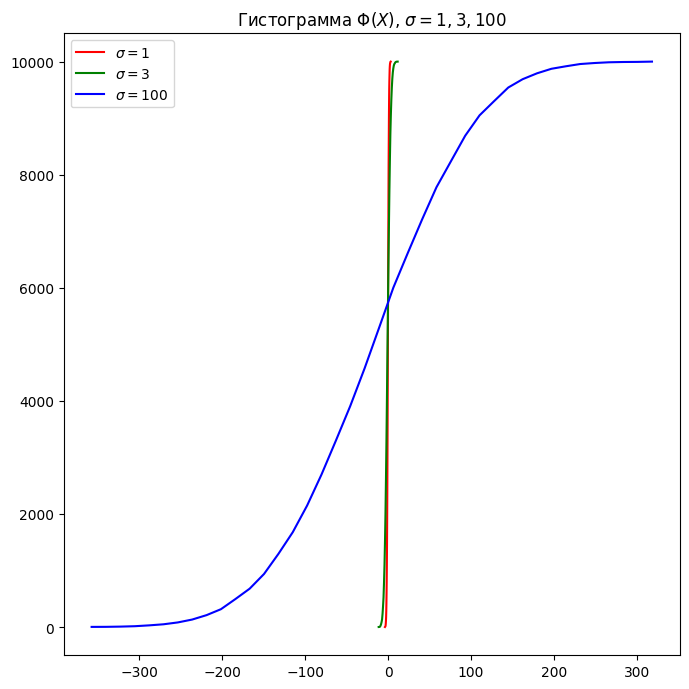

In [50]:
sigmas = [1, 3, 100]
colors = ['red', 'green', 'blue']

for i in range(len(sigmas)):
    norm_distribution = np.random.normal(0, sigmas[i], 10**4)
    values, base = np.histogram(norm_distribution, bins=40)
    cumulative = np.cumsum(values)
    plt.plot(base[:-1], cumulative, c=colors[i], label='$\sigma = {}$'.format(sigmas[i]))

plt.legend()
plt.title('Гистограмма $\Phi(X)$, $\sigma = 1, 3, 100$')

На первый взгляд может показаться, что изменение дисперсии сглаживает нормальное распределение и делает его похожим на равномерное распределение. Это ложное предположение. Увеличение дисперсии будет сходиться к другой случайной величине с нормальным распределением. 

### Задача 4 (квантильное преобразование)

В прошлом семестре мы с вами говорили про квантильное преобразование, но ни разу его не использовали. Давайте это исправим.

Пуcть у нас есть стрёмная функция распределения: 

$$
F(x) = \left( \frac{\ln x}{\ln \theta} \right)^{\alpha},  \quad x \in [1; \theta]
$$

__[2.5 балла]__ Сгенерируйте из него выборку с помощью квантильного преобразования. Параметры $\alpha$ и $\theta$ возьмите на свой вкус.

P.S. [видео, которое поможет](https://www.youtube.com/watch?v=ivpWyorfWlA&list=PLCf-cQCe1FRyg1ajZ2HJVKknbuTujBOLN&index=11)

(array([100511., 100000.,  99630., 100226., 100292.,  99302., 100230.,
         99752., 100372.,  99685.]),
 array([1.00000195, 1.50000169, 2.00000143, 2.50000116, 3.0000009 ,
        3.50000064, 4.00000038, 4.50000011, 4.99999985, 5.49999959,
        5.99999932]),
 <BarContainer object of 10 artists>)

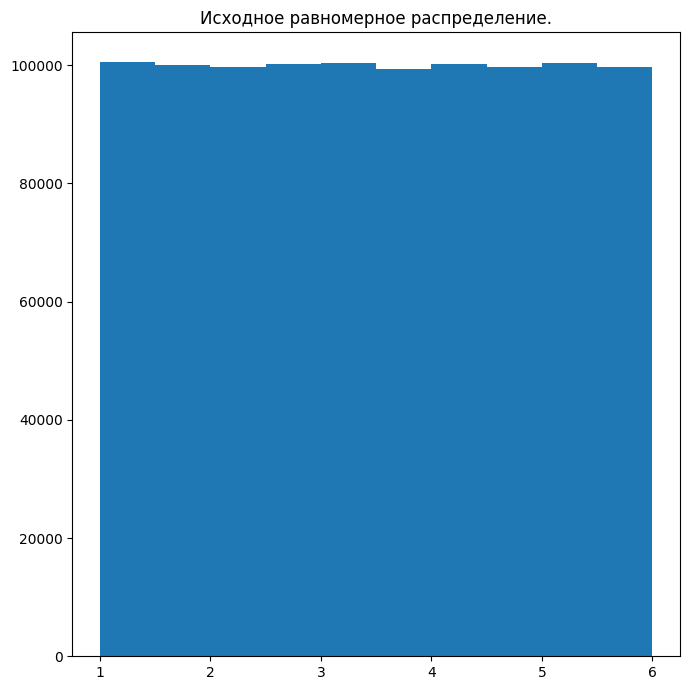

In [51]:
import scipy.stats as sts

alpha = 10
theta = 5

uniform_rv = sts.uniform(1, theta)
n_obs = 10**6
y = uniform_rv.rvs(n_obs)

plt.title('Исходное равномерное распределение.')
plt.hist(y)

$F{X}(y)^{-1} = \theta^{\sqrt[\alpha]{y}}$

(array([0.24901337, 0.25229836, 0.25488327, 0.26053777, 0.2680771 ,
        0.27949381, 0.2792784 , 0.2860638 , 0.28773322, 0.2905874 ,
        0.2987191 , 0.30340426, 0.30248877, 0.32182177, 0.31535949,
        0.32241415, 0.32801479, 0.33210757, 0.33372315, 0.34212412,
        0.33970076, 0.34713239, 0.3576336 , 0.35747204, 0.37292767,
        0.37319693, 0.37475865, 0.37944381, 0.38676773, 0.39818443,
        0.39489944, 0.40443131, 0.41654809, 0.41390933, 0.41477096,
        0.42290267, 0.43006504, 0.44158944, 0.44999041, 0.45359852,
        0.45413705, 0.46173023, 0.46167638, 0.47869373, 0.48504831,
        0.49339543, 0.4904874 , 0.50874335, 0.50955114, 0.51235146,
        0.52699931, 0.53513101, 0.53534642, 0.54380125, 0.5415933 ,
        0.55489483, 0.5621649 , 0.5778898 , 0.5678194 , 0.58144405,
        0.59695354, 0.59878452, 0.60551606, 0.61730973, 0.61957153,
        0.61957153, 0.62894184, 0.63201143, 0.64089707, 0.65559877,
        0.65732204, 0.67180833, 0.67724742, 0.68

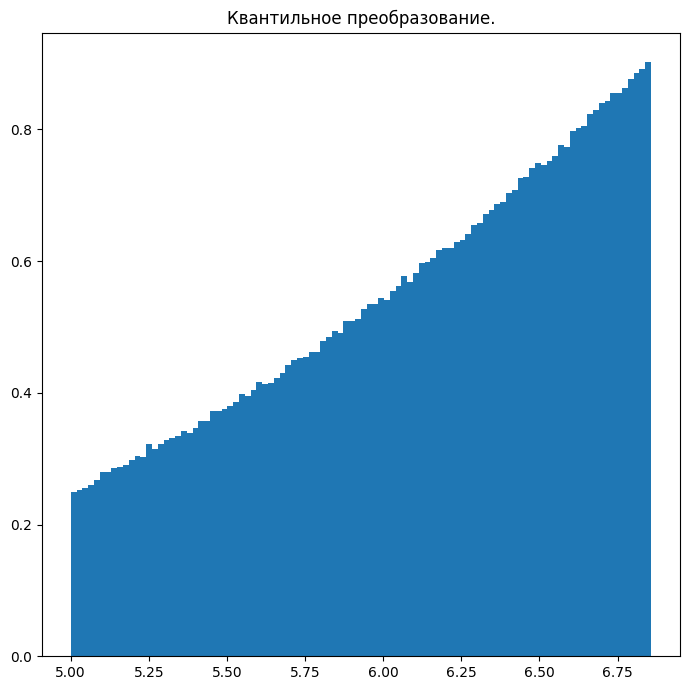

In [52]:
x = theta ** (y ** (1. / alpha))
plt.title('Квантильное преобразование.')
plt.hist(x, density = True, bins = 100)

### Задача 5 (свойства оценок)

У Дианы есть выборка $X_1, \dots, X_n \sim iid N(0, \sigma^2)$. Она собирается использовать для параметра $\sigma$ нестандартную оценку $\hat \sigma = \frac{1}{n} \sum_{i=1}^n |x_i|$. 

Пусть природа решила, что $\sigma^2 = 16$. 

__а) [5 баллов]__ С помощью симуляций проверьте несмещённость оценки, состоятельность оценки.

__б) [2.5 балла]__ Решая задачку руками, вы получили скорректированную на смещение $\hat \sigma.$ Постройте на одном графике распределение для неё и для классической $\hat s$. Какая из них эффективнее? 

P.S. [несколько видео, которое помогут иши тут](https://www.youtube.com/watch?v=arYqiJcyE2s&list=PLCf-cQCe1FRxdjkT1RjdmuFeco11U8ZIP)

In [66]:
norm_distribution = np.random.normal(0, 16, 10**6)

sum = 0
for i in range(len(norm_distribution)):
    sum = sum + np.abs(norm_distribution[i])

experimental_sigma = np.sqrt(sum / len(norm_distribution))
print('Нестандартная оценка σ̂ : {}'.format(experimental_sigma))

Нестандартная оценка σ̂ : 3.569837643548511


Оцененное значение $\hat \sigma$ отличается от истинной $\sigma$, используемой в этой симуляции. σ, Значит оценка – смещенная. Теперь проверим состоятельность оценки. Оценка состоятельна, если по мере увеличения размера выборки оценки «сходятся» к истинному значению оцениваемого параметра.

In [76]:
sample_sizes = np.arange(1, 10**3, 1).tolist()

approximations = []
approximations_corrected = []
iterations = 100

for sample_size in sample_sizes:
    iter_approximations = []
    iter_approximations_corrected = []
    
    for i in range(iterations):
        norm_distribution = np.random.normal(0, 16, sample_size)

        sum = 0
        for n in norm_distribution:
            sum = sum + np.abs(n)

        approx_sigma = np.sqrt(sum / len(norm_distribution))
        iter_approximations.append(approx_sigma)
        
        corrected_approx_sigma = np.sqrt((np.sqrt(np.pi) / np.sqrt(2)) * sum / len(norm_distribution))
        iter_approximations_corrected.append(corrected_approx_sigma)

    approx_sigma = np.sum(iter_approximations) / len(iter_approximations)
    approximations.append(approx_sigma)
    
    approx_sigma = np.sum(iter_approximations_corrected) / len(iter_approximations_corrected)
    approximations_corrected.append(approx_sigma)

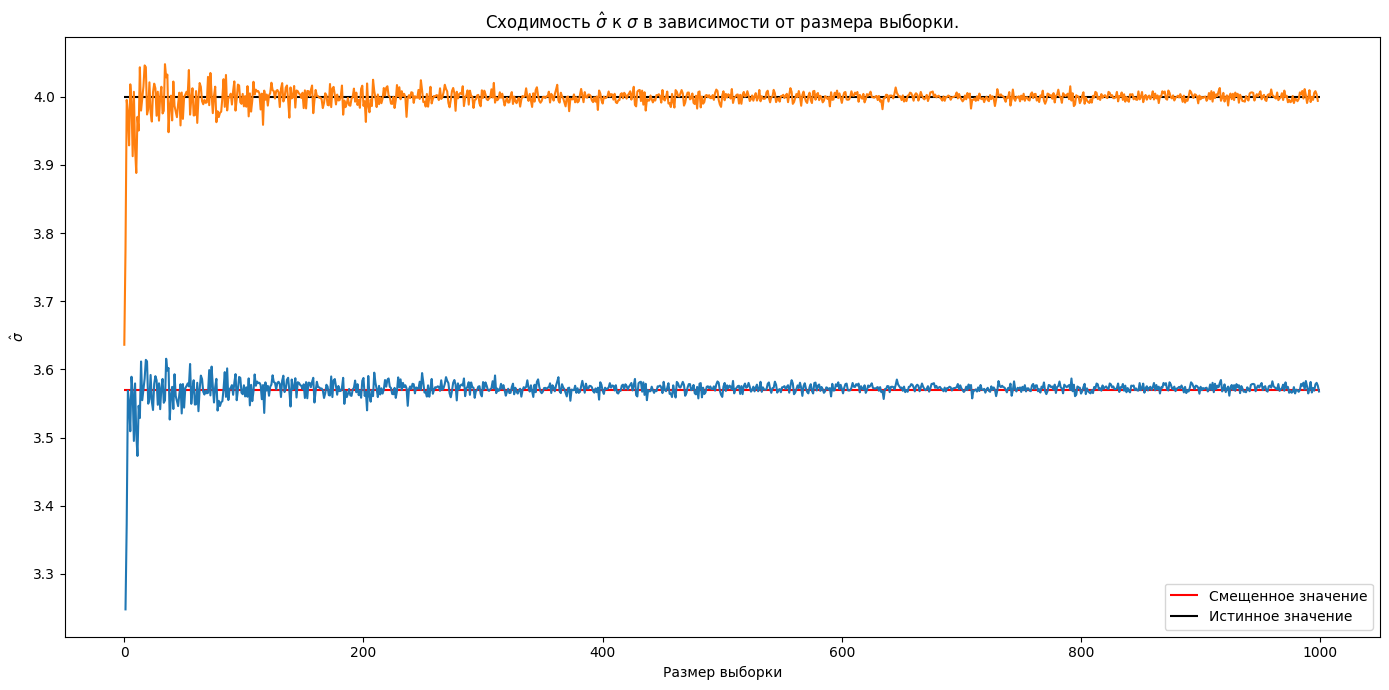

In [79]:
plt.rcParams["figure.figsize"] = [14.00, 7]
plt.rcParams["figure.autolayout"] = True

plt.xlabel('Размер выборки', fontsize=10)
plt.ylabel('$\hat \sigma$', fontsize=10)
plt.title('Сходимость $\hat \sigma$ к $\sigma$ в зависимости от размера выборки.')
plt.hlines(experimental_sigma, 0, 10**3, color='red', label='Смещенное значение')
plt.hlines(4, 0, 10**3, color='black', label='Истинное значение')
plt.legend(fontsize = 10)
plt.plot(sample_sizes, approximations, approximations_corrected)
plt.show()

На графике видно, что по мере увеличения размера выборки оценка стабилизируется около вокруг некоторого значения сигмы. Можно сделать вывод, что оценка состоятельна. Мы должны помнить, что наша оценка смещенна. Вот почему она сходится к 3,6 вместо 4.

**Бонус (1 балл):** 

Прикрепите фотографию того, как вы провели этот февраль. Какую самую классную эмоцию вы испытали за прошедший месяц?

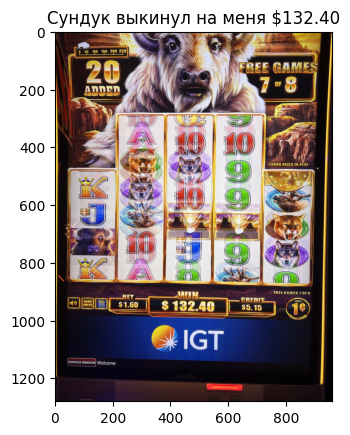

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('photo_2023-04-17_20-40-57.jpg')
imgplot = plt.imshow(img)
plt.title('Сундук выкинул на меня $132.40')
plt.show() 